<a href="https://colab.research.google.com/github/tayyabijaz/DataScience/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score


## reading files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [13]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,origin
0,1,0,43,27.0,4.0,12.454744,1.890585,10983.045722,1.885133,7.145402,2.240672,0,9,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.000000,1,0,7,3,0,0,16,1,0,0,0,0,0,0,0,...,1079.37,859.52,5.0,21.0,22.0,16.0,3.0,1.0,0.0,2.0,4.0,0.0,0.0,21.0,1.0,13.09,13.31,29.0,807385.0,52.0,4036616.0,152.0,708.57,1185.71,947.14,12.0,39.0,48.0,40.0,9.0,4.0,0.0,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0,0
1,2,1,34,19.0,3.0,12.454744,1.890585,10983.045722,1.885133,7.145402,2.240672,0,69,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.000000,1,0,6,1,1,1,3,0,0,0,0,0,0,0,0,...,1086.21,858.62,1.0,11.0,11.0,4.0,2.0,1.0,0.0,1.0,7.0,0.0,6.0,19.0,1.0,10.26,27.47,66.0,2690465.0,40.0,2034942.0,177.0,673.81,1148.81,911.31,9.0,49.0,65.0,36.0,15.0,3.0,0.0,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0,0
2,3,2,43,29.0,2.0,12.454744,1.890585,10983.045722,1.885133,7.145402,2.240672,0,125,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.000000,1,0,5,1,0,0,0,1,0,0,0,1,0,0,0,...,1192.31,944.87,2.0,9.0,17.0,9.0,3.0,1.0,0.0,0.0,11.0,0.0,0.0,20.0,6.0,13.69,21.58,43.0,1478160.0,35.0,1572990.0,122.0,702.68,1196.43,949.55,10.0,29.0,45.0,25.0,10.0,3.0,0.0,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0,0
3,4,3,89,50.0,9.0,12.454744,1.890585,10983.045722,1.885133,7.145402,2.240672,0,65,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,1206.830869,1,0,17,6,0,0,11,4,0,0,0,0,0,0,0,...,1218.75,968.75,0.0,5.0,14.0,10.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,18.0,3.0,14.18,3.89,8.0,244166.0,22.0,942180.0,61.0,931.58,1552.63,1242.11,4.0,7.0,21.0,15.0,11.0,2.0,1.0,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0,0
4,5,4,77,77.0,4.0,12.454744,1.890585,10983.045722,1.885133,7.145402,2.240672,0,6,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.000000,4,2,25,2,0,0,10,93,0,0,0,1,1,0,0,...,1410.45,1131.74,63.0,266.0,267.0,262.0,149.0,57.0,4.0,70.0,121.0,1.0,40.0,77.0,5.0,8.38,10.92,689.0,8404624.0,114.0,3503058.0,2283.0,853.88,1411.45,1132.66,143.0,566.0,578.0,552.0,319.0,108.0,17.0,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0,0


In [14]:
test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,origin
0,30474,0,39.0,20.700000,2,9,1,1998.0,1,8.9,3.0,0,38,2.615514e+07,178264,0.137846,0.041116,14080,11926.00000,11,14892,24750.000000,13,1,1204.336004,1,0,13,4,0,0,4,4,0,0,0,0,0,0,0,...,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1,1
1,30475,0,79.2,32.660037,8,17,1,0.0,3,1.0,1.0,1,102,2.553630e+07,4001,0.496315,0.007122,275,3260.32575,0,264,8205.414043,0,0,1204.336004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1,1
2,30476,0,40.5,25.100000,3,5,2,1960.0,2,4.8,2.0,0,84,9.946335e+06,139322,0.065409,0.225825,6400,2232.00000,7,6558,7966.000000,7,0,1548.000000,3,0,13,0,0,0,2,7,1,0,1,1,0,0,0,...,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11,1
3,30477,0,62.8,36.000000,17,17,1,2016.0,2,62.8,3.0,1,104,2.149409e+07,7122,0.262459,0.017647,489,3260.32575,0,469,8205.414043,0,0,1204.336004,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0,1
4,30478,0,40.0,40.000000,17,17,1,0.0,1,1.0,1.0,1,102,2.553630e+07,4001,0.496315,0.007122,275,3260.32575,0,264,8205.414043,0,0,1204.336004,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1,1


In [0]:
#### Preprocessing This step involves imputing all missing values and label encoding of all categorical variables.####

## missing values
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))


for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))

## label encoding
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')


In [0]:
## creating a new feature origin
train['origin'] = 0
test['origin'] = 1
training = train.drop('price_doc',axis=1) #droping target variable

In [0]:
## taking sample from training and test data
training = training.sample(7662, random_state=12)
testing = test.sample(7000, random_state=11)


In [0]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)

In [11]:
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combi.columns:
  score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=2,scoring='roc_auc')
  #The value of AUC-ROC for a particular feature is greater than 0.80, we classify that feature as drifting.
  if (np.mean(score) > 0.8):
    drop_list.append(i)
  print(i,np.mean(score))

id 1.0
timestamp 0.9056090353134206
full_sq 0.6608949174031398
life_sq 0.8436488980870342
floor 0.5107098668754895
max_floor 0.9012835887683186
material 0.8937130924413619
build_year 0.9387935078494984
num_room 0.8896798486034978
kitch_sq 0.9640305216840064
state 0.9324435432747884
product_type 0.5162015139650222
sub_area 0.7006014281985309
area_m 0.6385902226199799
raion_popul 0.638261233545885
green_zone_part 0.6527779766565984
indust_part 0.6427459074467688
children_preschool 0.6409893724130216
preschool_quota 0.7489114927098482
preschool_education_centers_raion 0.5167148264160795
children_school 0.6430782712458516
school_quota 0.7492918670992281
school_education_centers_raion 0.539660905395831
school_education_centers_top_20_raion 0.5026375992840364
hospital_beds_raion 0.8943384420330388
healthcare_centers_raion 0.5368025319759855
university_top_20_raion 0.5023344706715889
sport_objects_raion 0.5645247417682814
additional_education_raion 0.559117350934109
culture_objects_top_25 0.5

In [12]:
#Here I have classified seven features as drifting. 
 drop_list

['id',
 'timestamp',
 'life_sq',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500']

Below Histogram shows the one Material Variable and we can see the shift/drifting. 

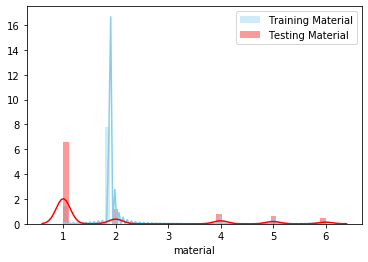

In [78]:
# Import library
import seaborn as sns


 
# Method 1: on the same Axis
sns.distplot( training["material"] , color="skyblue", label="Training Material")
sns.distplot( testing["material"] , color="red", label="Testing Material")
plt.legend()
plt.show()
